Author: Haritha Dhanlalji Parmar

In [ ]:
%pwd
%ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd
%ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive/dl
%pwd
%ls

/content/drive/.shortcut-targets-by-id/1-xaDXMHcqclTYk6d9BAt2ypIA724QwoD/dl
 faster_rcnn_model.pth                 Outputs/                 videos/        yolov8m.pt
'Final Model_FasterRCNN_Model.ipynb'   runs/                    yolo11n.pt
 FinalProject-YOLOv8.ipynb             udacity-car-dataset-1/   YOLOv8m5k.pt


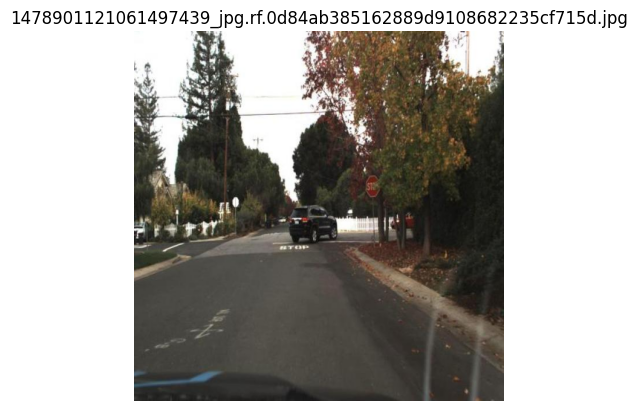

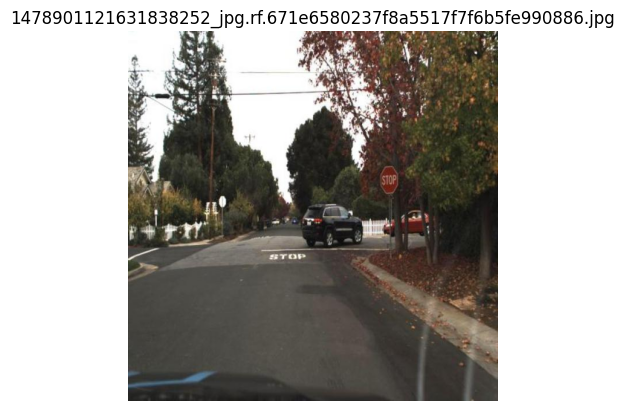

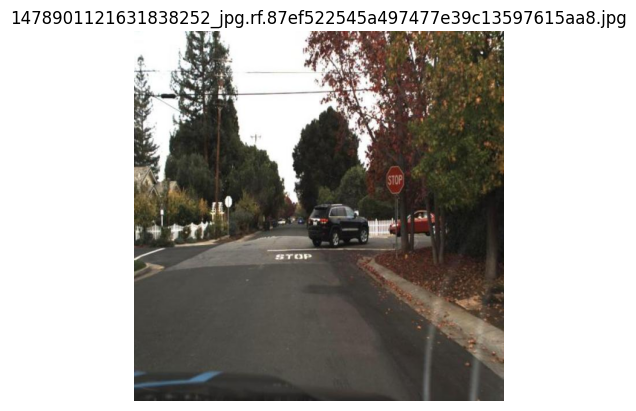

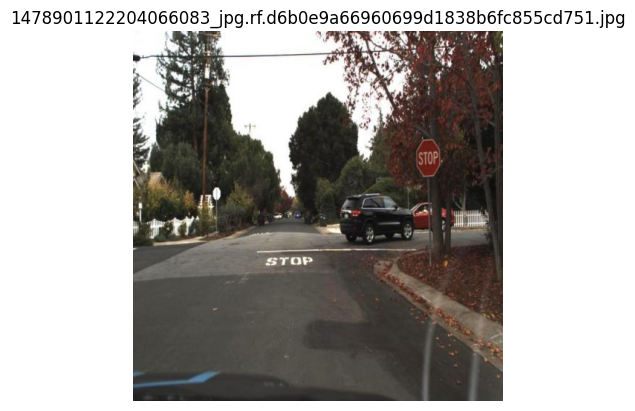

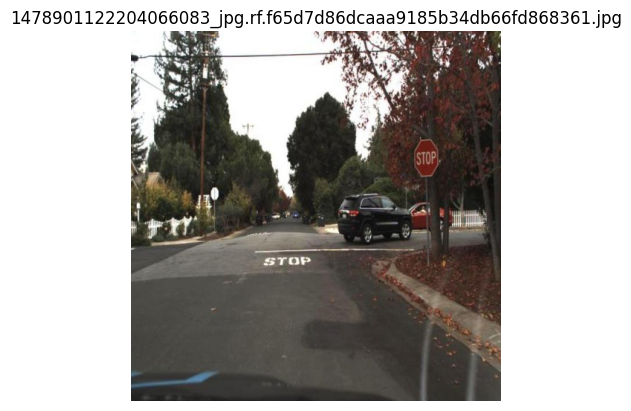

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Set up the path to the image folder
images_path = 'udacity-car-dataset-1/train/images'

# Check if images path exists
if not os.path.exists(images_path):
    print(f"Error: Path '{images_path}' does not exist.")
else:
    # List a few image files
    sample_images = os.listdir(images_path)[:5]  # Adjust the number of samples as needed
    if not sample_images:
        print(f"No images found in '{images_path}'.")
    else:
        # Display the images
        for img_file in sample_images:
            img_path = os.path.join(images_path, img_file)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Error loading image: {img_file}")
                continue
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb)
            plt.title(img_file)
            plt.axis('off')
            plt.show()


In [ ]:
import os
import random

# Define base directories for images and labels
base_dir = 'udacity-car-dataset-1'
image_dirs = {
    'train': os.path.join(base_dir, 'train', 'images'),
    'valid': os.path.join(base_dir, 'valid', 'images'),
    'test': os.path.join(base_dir, 'test', 'images')
}
label_dirs = {
    'train': os.path.join(base_dir, 'train', 'labels'),
    'valid': os.path.join(base_dir, 'valid', 'labels'),
    'test': os.path.join(base_dir, 'test', 'labels')
}

# Function to verify image-label pairs in a sample
def verify_random_samples(image_dir, label_dir, split_name, sample_size=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    print(f"Checking random samples in {split_name} split:")
    # Select a random sample of image files
    random_samples = random.sample(image_files, min(sample_size, len(image_files)))

    unmatched_images = []
    unmatched_labels = []

    # Check if each sampled image has a corresponding label
    for img in random_samples:
        label_name = img.replace('.jpg', '.txt')
        if label_name not in label_files:
            unmatched_images.append(img)

    # Check if any labels do not have corresponding images
    random_samples_labels = random.sample(label_files, min(sample_size, len(label_files)))
    for lbl in random_samples_labels:
        image_name = lbl.replace('.txt', '.jpg')
        if image_name not in image_files:
            unmatched_labels.append(lbl)

    if unmatched_images:
        print(f"Unmatched images (no corresponding label): {unmatched_images}")
    else:
        print("All sampled images have corresponding labels.")

    if unmatched_labels:
        print(f"Unmatched labels (no corresponding image): {unmatched_labels}")
    else:
        print("All sampled labels have corresponding images.")

    print("-" * 40)

# Verify random samples in train, valid, and test directories
for split in ['train', 'valid', 'test']:
    verify_random_samples(image_dirs[split], label_dirs[split], split)


Checking random samples in train split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------
Checking random samples in valid split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------
Checking random samples in test split:
All sampled images have corresponding labels.
All sampled labels have corresponding images.
----------------------------------------


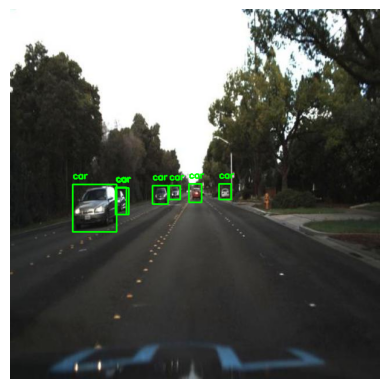

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

# Paths to your images and labels folders
images_path = 'udacity-car-dataset-1/test/images'
labels_path = 'udacity-car-dataset-1/test/labels'

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, label_path, class_names):
    # Load the image
    image = cv2.imread(image_path)
    h, w = image.shape[:2]  # Image dimensions

    # Read label file
    with open(label_path, 'r') as f:
        labels = f.readlines()

    for label in labels:
        # Parse label information
        class_id, x_center, y_center, bbox_width, bbox_height = map(float, label.strip().split())
        x_center, y_center, bbox_width, bbox_height = int(x_center * w), int(y_center * h), int(bbox_width * w), int(bbox_height * h)

        # Calculate box coordinates
        x1 = int(x_center - bbox_width / 2)
        y1 = int(y_center - bbox_height / 2)
        x2 = int(x_center + bbox_width / 2)
        y2 = int(y_center + bbox_height / 2)

        # Draw rectangle and label text
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, class_names[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Sample usage
class_names = ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft',
               'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

# Select a random image from the images folder
random_image = random.choice([f for f in os.listdir(images_path) if f.endswith('.jpg')])
image_path = os.path.join(images_path, random_image)
label_path = os.path.join(labels_path, random_image.replace('.jpg', '.txt'))  # Ensure labels match images

# Display the randomly selected image with bounding boxes
display_image_with_boxes(image_path, label_path, class_names)


The Faster R-CNN model is a state-of-the-art object detection architecture composed of several key components. Below, I’ll break down the layers, architecture, number of neurons, activation functions, and the overall structure of the model, focusing on the specific configuration of fasterrcnn_resnet50_fpn from PyTorch.



1. Overview of the Architecture
The Faster R-CNN architecture comprises the following components:

Backbone: A convolutional neural network (e.g., ResNet-50) that extracts feature maps from the input image.

Feature Pyramid Network (FPN): Enhances the feature maps by combining information from multiple scales.

Region Proposal Network (RPN): Proposes candidate regions (bounding boxes) likely to contain objects.

ROI Align: Extracts fixed-size feature maps from the proposed regions.

Box Head (Classification and Regression): Performs object classification and bounding box regression.



2. Layer Details
a. Backbone (ResNet-50)
Purpose: Extracts feature maps from input images.
Structure: ResNet-50 contains 5 stages of convolutional layers, with the following structure per stage:

Stage--Number of Layers--Filter Sizes--Activation Function

Conv1	--1Conv2D + MaxPool--7x7,64 filters--ReLU

Conv2_x--3Bottleneck Blocks--1x1, 3x3, 1x1--ReLU

Conv3_x--4 Bottleneck Blocks--1x1, 3x3, 1x1--ReLU

Conv4_x--6 Bottleneck Blocks--1x1, 3x3, 1x1--ReLU

Conv5_x--3 Bottleneck Blocks--1x1, 3x3, 1x1--ReLU

Each bottleneck block has:


3 layers:
1x1 convolution (reduces dimensionality).
3x3 convolution (extracts features).
1x1 convolution (restores dimensionality).
Neurons: Determined by the number of filters in each convolution layer.


b. Feature Pyramid Network (FPN)
Purpose: Combines features from different stages of the backbone for multi-scale detection.
Structure:
Top-down pathway: Uses upsampling.
Lateral connections: Combines features from backbone stages.
Outputs feature maps at different scales (P2, P3, P4, P5).


c. Region Proposal Network (RPN)
Purpose: Proposes regions of interest likely to contain objects.
Structure:
Sliding window over feature maps.
Conv Layer: 3x3 convolution (shared for all locations).
Output:
Classification head: For objectness score (object vs. background).
Regression head: For bounding box coordinates (x, y, w, h).


d. ROI Align
Purpose: Extracts fixed-size feature maps for each region of interest (RoI).
Details:
Input: Feature maps and RoIs from the RPN.
Output: Feature maps resized to a fixed size (e.g., 7x7).


e. Box Head
Purpose: Performs object classification and bounding box regression.


Structure:
Fully Connected Layers:
Two 1024-neuron fully connected layers with ReLU.
Classification Head:
Outputs class scores (number of neurons = num_classes).
Regression Head:
Outputs bounding box coordinates for each class (number of neurons = 4 * num_classes).


3. Activation Functions
ReLU (Rectified Linear Unit):
Used throughout the convolutional and fully connected layers.
Softmax:
Used in the classification head to output class probabilities.
None:
No activation in the bounding box regression head (outputs raw coordinates).


4. Layer and Neuron Counts
ResNet-50 Backbone:
Total layers: 50 (as defined by the ResNet-50 architecture).
Total neurons: Determined by filter counts and image dimensions.

FPN:
Total layers: Adds lateral and top-down connections to ResNet stages.
Neurons: Determined by feature map sizes.

RPN:
Total layers: 1 3x3 convolution layer + 2 heads (classification and regression).
Neurons: Determined by anchor sizes and feature map dimensions.

ROI Align:
Total layers: None (purely an operation).
Neurons: Output size is fixed (e.g., 7x7 feature map per RoI).

Box Head:
Total layers: 2 fully connected + 2 heads (classification and regression).

Neurons:
Fully connected: 1024 neurons each.
Classification: num_classes neurons.
Regression: 4 * num_classes neurons.


5. Total Number of Layers
ResNet-50 backbone: 50 layers.
FPN: Adds connections for multi-scale feature extraction.
RPN: 1 convolutional layer + 2 heads.
Box Head: 2 fully connected layers + 2 heads.
Approximate total layers: ~60-70, depending on how FPN connections are counted.


6. Output
Classification: Probabilities for each class (excluding background).
Bounding Box Regression: Adjusted coordinates for each proposed region.


In [ ]:
import os
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import cv2
import numpy as np

# Define the custom dataset
class CustomDataset(Dataset):
    def __init__(self, images_path, labels_path, transforms=None):
        self.images_path = images_path
        self.labels_path = labels_path
        self.transforms = transforms
        self.image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_file = self.image_files[idx]
        img_path = os.path.join(self.images_path, img_file)
        label_path = os.path.join(self.labels_path, img_file.replace('.jpg', '.txt'))

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0  # Normalize image

        # Load labels
        boxes = []
        labels = []
        with open(label_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                boxes.append([
                    x_center - width / 2,  # x_min
                    y_center - height / 2, # y_min
                    x_center + width / 2,  # x_max
                    y_center + height / 2  # y_max
                ])
                labels.append(int(class_id))

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels
        }

        if self.transforms:
            image, target = self.transforms(image, target)

        return torch.tensor(image, dtype=torch.float32).permute(2, 0, 1), target

# Define the Faster R-CNN model
def get_model(num_classes):
    # Load a pre-trained model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # Replace the classifier with a new one
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
    return model

# Function to train the model
def train_model(model, data_loader, optimizer, num_epochs=1, print_interval=100):
    model.train()
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        for i, (images, targets) in enumerate(data_loader):
            # Move images and targets to device
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Zero gradients, forward pass, backward pass
            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()

            # Print loss for every `print_interval` batches
            if (i + 1) % print_interval == 0:
                print(f"Batch {i + 1}, Loss: {losses.item():.4f}")

# Dataset paths
images_path = 'udacity-car-dataset-1/train/images'
labels_path = 'udacity-car-dataset-1/train/labels'

# Initialize dataset and dataloader
dataset = CustomDataset(images_path, labels_path)
# Subset the dataset for training on 1000 images
dataset = torch.utils.data.Subset(dataset, range(1000))
data_loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Device setup
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Get the model
num_classes = 12  # 11 classes + 1 for background
model = get_model(num_classes).to(device)

# Optimizer and learning rate scheduler
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Train the model
train_model(model, data_loader, optimizer, num_epochs=2, print_interval=100)

# Save the model
model_save_path = "faster_rcnn_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Load the model
loaded_model = get_model(num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model = loaded_model.to(device)
print("Model loaded successfully")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 110MB/s] 


Epoch 1/2


In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# Store training losses
loss_history = []

def train_model_with_loss_tracking(model, data_loader, optimizer, num_epochs=1, print_interval=100):
    model.train()
    global loss_history  # To track loss globally
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        epoch_losses = []
        for i, (images, targets) in enumerate(data_loader):
            # Move images and targets to device
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Zero gradients, forward pass, backward pass
            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()

            epoch_losses.append(losses.item())

            # Print loss for every `print_interval` batches
            if (i + 1) % print_interval == 0:
                print(f"Batch {i + 1}, Loss: {losses.item():.4f}")
        loss_history.append(sum(epoch_losses) / len(epoch_losses))  # Average loss for the epoch




In [ ]:
# Visualization Function
def visualize_predictions(model, dataset, num_images=5):
    model.eval()
    with torch.no_grad():
        for i in range(num_images):
            image, target = dataset[i]
            image = image.to(device).unsqueeze(0)  # Add batch dimension

            # Get predictions
            prediction = model(image)[0]
            boxes = prediction['boxes']
            labels = prediction['labels']
            scores = prediction['scores']

            # Filter predictions by confidence score (e.g., > 0.5)
            keep = scores > 0.5
            boxes = boxes[keep]
            labels = labels[keep]
            scores = scores[keep]

            if len(boxes) == 0:
                print(f"No predictions with confidence > 0.5 for image {i}")
                continue

            # Convert labels to strings (e.g., for display purposes)
            labels = [str(label.item()) for label in labels]

            # Draw bounding boxes on the image
            image_with_boxes = draw_bounding_boxes(
                (image[0] * 255).to(torch.uint8).cpu(),
                boxes.cpu(),
                labels=labels,
                colors="red"
            )

            # Convert to PIL image and show
            pil_image = to_pil_image(image_with_boxes)
            plt.imshow(pil_image)
            plt.title(f"Predictions for Image {i}")
            plt.axis("off")
            plt.show()


# Loss Curve Plot
def plot_loss_curve(loss_history):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.grid()
    plt.show()

# Generate F-Curve
def calculate_f_curve(model, data_loader, iou_threshold=0.5):
    model.eval()
    precisions, recalls = [], []
    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Get predictions
            outputs = model(images)

            for i in range(len(images)):
                pred_boxes = outputs[i]['boxes'].cpu()
                pred_labels = outputs[i]['labels'].cpu()
                true_boxes = targets[i]['boxes'].cpu()
                true_labels = targets[i]['labels'].cpu()

                # Compute IoU
                iou = torchvision.ops.box_iou(pred_boxes, true_boxes)
                max_iou, idxs = iou.max(dim=1)

                # Match predictions with ground truth
                matched_preds = max_iou >= iou_threshold
                tp = matched_preds.sum().item()
                fp = (~matched_preds).sum().item()
                fn = len(true_labels) - tp

                precision = tp / (tp + fp) if tp + fp > 0 else 0
                recall = tp / (tp + fn) if tp + fn > 0 else 0
                precisions.append(precision)
                recalls.append(recall)

    # Plot F-curve
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, marker='o')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid()
    plt.show()

# Train the model with loss tracking
train_model_with_loss_tracking(model, data_loader, optimizer, num_epochs=2, print_interval=100)

# Visualize predictions
visualize_predictions(model, dataset, num_images=5)

# Plot the training loss curve
plot_loss_curve(loss_history)

# Calculate and plot F-curve
calculate_f_curve(model, data_loader)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#folder for the visualizations
folder_path = 'runs/detect/train22'

# List all PNG files in the folder
visualization_files = [file for file in os.listdir(folder_path) if file.endswith('.png') or file.endswith('.jpg')]

# Display each visualization
for file_name in visualization_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Folder containing visualizations
folder_path = 'runs/detect/train22'

# Filter validation batch images
val_batch_files = [file for file in os.listdir(folder_path) if 'val_batch' in file]

# Display validation batch images
for file_name in val_batch_files:
    file_path = os.path.join(folder_path, file_name)
    img = mpimg.imread(file_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(file_name)
    plt.axis('off')
    plt.show()

In [ ]:
import cv2
import torch
from torchvision.transforms import functional as F

# Define class names for detected objects
class_names = ['biker', 'car', 'pedestrian', 'trafficLight',
               'trafficLight-Green', 'trafficLight-GreenLeft',
               'trafficLight-Red', 'trafficLight-RedLeft',
               'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

def process_video_with_bboxes(model, input_video_path, output_video_path, confidence_threshold=0.2):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Cannot open video.")
        return

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    # Output video writer
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    model.eval()
    frame_idx = 0

    with torch.no_grad():
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Preprocess the frame
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

            # Get predictions
            try:
                predictions = model(image_tensor)[0]
                boxes = predictions.get('boxes', torch.empty(0))
                labels = predictions.get('labels', torch.empty(0))
                scores = predictions.get('scores', torch.empty(0))
            except Exception as e:
                print(f"Error processing frame {frame_idx}: {e}")
                break

            # Filter predictions by confidence threshold
            keep = scores > confidence_threshold
            boxes = boxes[keep]
            labels = labels[keep]
            scores = scores[keep]

            # Print detected objects
            print(f"\nFrame {frame_idx}: Detected objects:")
            if len(boxes) == 0:
                print("  No objects detected.")
            else:
                for box, label, score in zip(boxes, labels, scores):
                    box = box.cpu().numpy().astype(int)
                    label = label.item()
                    score = score.item()

                    # Get the class name
                    class_name = class_names[label] if label < len(class_names) else f"Unknown ({label})"

                    # Print object details
                    print(f"  Class: {class_name}, Score: {score:.2f}, Box: {box}")

                    # Draw the bounding box and label on the frame
                    cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
                    text = f"{class_name}: {score:.2f}"
                    cv2.putText(frame, text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Write the frame to the output video
            out.write(frame)
            frame_idx += 1

    # Release resources
    cap.release()
    out.release()
    print(f"Processed video saved to {output_video_path}")

# Input and output video paths
input_video_path = 'videos/traffic2.mp4'
output_video_path = 'Outputs/Output_FasterRcnn_Box_traffic2.mp4'

# Ensure model is loaded and device is set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Process the video with bounding boxes and labels
process_video_with_bboxes(model, input_video_path, output_video_path, confidence_threshold=0.2)


In [ ]:
%ls

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def display_video(video_path):
    with open(video_path, "rb") as video_file:
        video_data = b64encode(video_file.read()).decode()
    return HTML(f"""<video width=640 controls>
                     <source src="data:video/mp4;base64,{video_data}" type="video/mp4">
                     </video>""")

path = "Outputs/Output_FasterRcnn_Box_traffic2.mp4"
# Display the video
display_video(path)


In [ ]:
input_video_path1 = 'videos/traffic1.mp4'
output_video_path1 = 'videos/Output_FasterRcnn_traffic1.mp4'
input_video_path2 = 'videos/traffic3.mp4'
output_video_path2 = 'videos/Output_FasterRcnn_traffic3.mp4'
input_video_path3 = 'videos/traffic4.mp4'
output_video_path3 = 'videos/Output_FasterRcnn_traffic4.mp4'

process_video(model, input_video_path1, output_video_path1, confidence_threshold=0.5)
process_video(model, input_video_path2, output_video_path2, confidence_threshold=0.5)
process_video(model, input_video_path3, output_video_path3, confidence_threshold=0.5)